In [1]:
import os, sys
sys.path.append('../../')

import numpy as np
import matplotlib.pyplot as plt

import neurons

In [2]:
net = neurons.Network()

net.add(neurons.Sensory, 10, 'input')
net.add(neurons.ExpIF, 5, 'neurons',
    v_rest=-70,
    v_thres=-55,
    v_reset=-70,
    R_r=20,
    tau_r=0.01
)
net.connect('input', 'neurons')

net.compile()

initializing neurons... done.
checking if graph is connected... done.
initializing history... done.
model successfully compiled.



In [3]:
net.train = True

In [4]:
seconds = 10
dt = 0.001 # 1 ms


net.reset_history()
steps = int(seconds / dt)

for i in range(steps):
    if i % 20 == 0:
        if 1 <= i*dt < 4:
            net.bundles['input'].outputs[:] = 1
        if i*dt == 5:
            net.bundles['input'].outputs[:] = 0
        if 5 <= i*dt < 8:
            net.bundles['input'].outputs[:] = 1
        if i*dt == 9:
            net.bundles['input'].outputs[:] = 0
    else:
        net.bundles['input'].outputs[:] = 0.0
        
    net.step(dt)

../../neurons/neurons.py:193: RuntimeWarning: overflow encountered in exp
  (self.v_rest - self.voltage + self.D * np.exp((self.voltage - self.v_thres) / self.D) + self.R_v * self.current) / self.tau_v * dt,


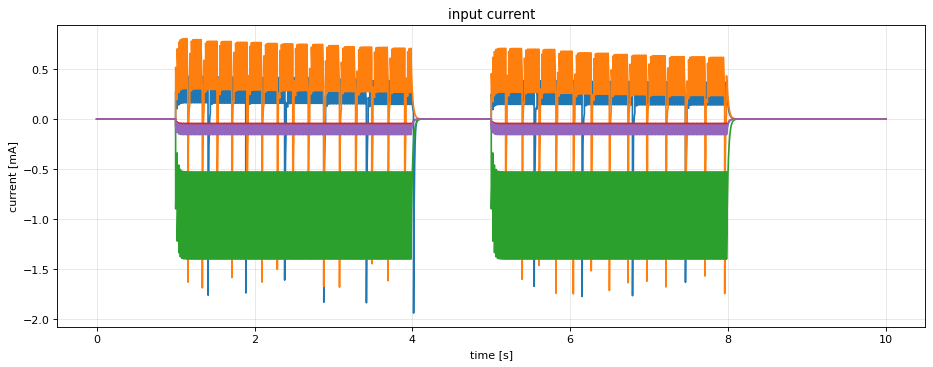

In [5]:
plt.figure(figsize=(14,5), dpi=80)
plt.title('input current')
plt.plot(np.arange(steps) * dt, net.history['neurons'].current)
plt.ylabel('current [mA]')
plt.xlabel('time [s]')
# plt.xlim(1,2)
plt.grid(alpha=0.3)
plt.show()

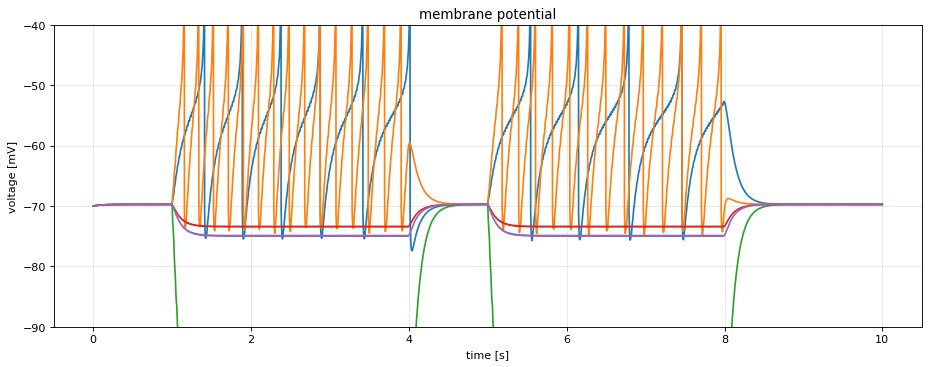

In [6]:
plt.figure(figsize=(14,5), dpi=80)
plt.title('membrane potential')
plt.plot(np.arange(steps) * dt, net.history['neurons'].voltage)
plt.ylabel('voltage [mV]')
plt.xlabel('time [s]')
plt.ylim(-90, -40)
# plt.xlim(7,9)
plt.grid(alpha=0.3)
plt.show()

In [7]:
def get_rates(data, width, dt):
    rates = []
    kernel = np.kaiser(width, 20)
    kernel /= kernel.sum() * dt
    for x in data.T:
        rates.append(np.convolve(x, kernel, 'same'))
    return np.stack(rates).T

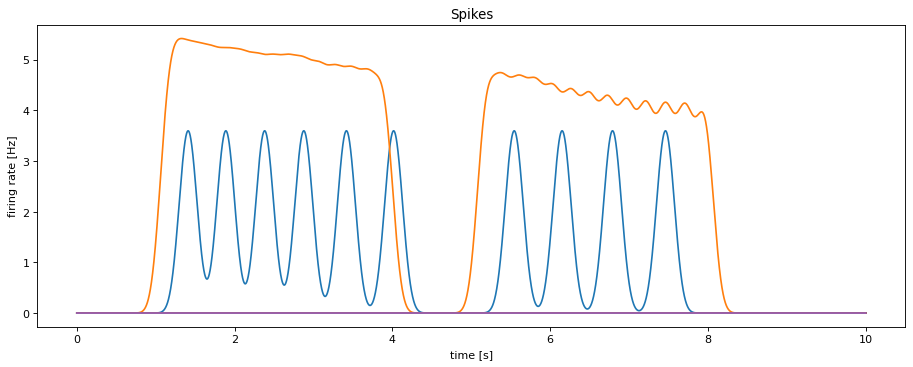

In [8]:
plt.figure(figsize=(14,5), dpi=80)
plt.title('Spikes')
plt.plot(np.arange(steps) * dt, get_rates(net.history['neurons'].outputs, 1000, dt))
plt.ylabel('firing rate [Hz]')
plt.xlabel('time [s]')
# plt.xlim(2,2.1)
plt.show()